<a href="https://colab.research.google.com/github/diva94/First/blob/master/facemask_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Datadir = "/content/drive/MyDrive/MaskDetection"
Categories = ["Mask","WithoutMask"]

for category in Categories:
  path = os.path.join(Datadir, category)
  for Img in os.listdir(path):
    Img_array = cv2.imread(os.path.join(path,Img),cv2.IMREAD_GRAYSCALE)

print("success")

success


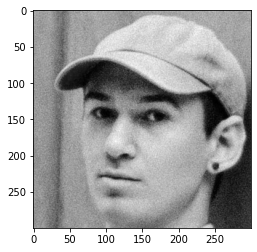

In [ ]:
Img_size = 300

new_array = cv2.resize(Img_array,(Img_size,Img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []
def create_training_data():
  for category in Categories:
    path = os.path.join(Datadir, category)
    class_num = Categories.index(category)
    for Img in os.listdir(path):
      try:
        vid_array = cv2.imread(os.path.join(path,Img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(vid_array,(Img_size,Img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

0
1
1
0
0
1
1
0
0
1


In [ ]:
X = []
y = []
for features,label in training_data:
  X.append(features)
  y.append(label)
# vid_size = 150
X = np.array(X).reshape(-1, Img_size,Img_size, 1)
y = np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "MaskDetection-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

history=model.fit(X, y, batch_size = 10, epochs=7, validation_split = 0.1, callbacks=[tensorboard])

Epoch 1/7
35/35 [==============================] - 2s 49ms/step - loss: 1.3218 - accuracy: 0.5974 - val_loss: 0.5705 - val_accuracy: 0.7632
Epoch 2/7
35/35 [==============================] - 1s 41ms/step - loss: 0.3286 - accuracy: 0.8355 - val_loss: 0.6744 - val_accuracy: 0.6053
Epoch 3/7
35/35 [==============================] - 1s 42ms/step - loss: 0.2398 - accuracy: 0.8931 - val_loss: 0.4469 - val_accuracy: 0.8684
Epoch 4/7
35/35 [==============================] - 1s 41ms/step - loss: 0.0675 - accuracy: 0.9839 - val_loss: 0.5515 - val_accuracy: 0.7895
Epoch 5/7
35/35 [==============================] - 1s 42ms/step - loss: 0.0476 - accuracy: 0.9942 - val_loss: 0.7936 - val_accuracy: 0.7632
Epoch 6/7
35/35 [==============================] - 1s 41ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.7294 - val_accuracy: 0.8421
Epoch 7/7
35/35 [==============================] - 1s 42ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.8737 - val_accuracy: 0.7895


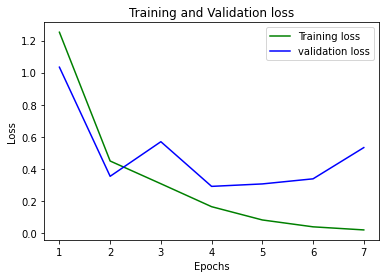

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,8)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

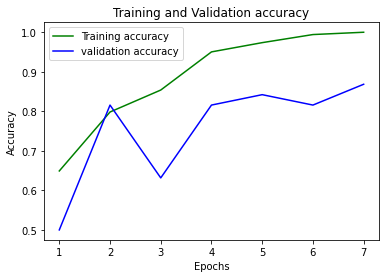

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,8)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0

In [ ]:
import os
path = os.chdir('/content/drive/MyDrive/MaskDetection')
model.save('MaskDetection.model')
#tf.keras.models.save_model(model, "saved_model.hp5", save_format="h5")

INFO:tensorflow:Assets written to: MaskDetection.model/assets


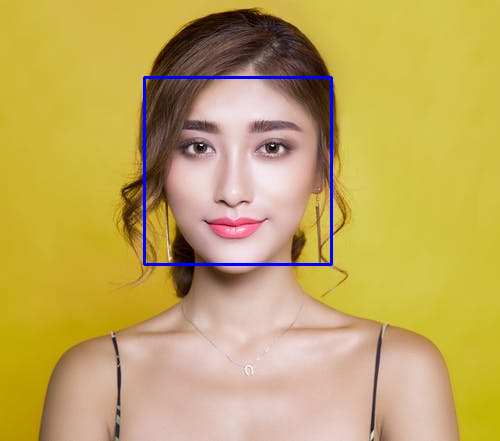

0
mask


In [ ]:
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow

Categories = ["Mask, WithoutMask"]

def prepare(filepath):
  Img_size =300
  Img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(Img_array,(Img_size,Img_size))
  return new_array.reshape(-1,Img_size,Img_size,1)
os.chdir('/content/drive/MyDrive/MaskDetection')
model = tf.keras.models.load_model("MaskDetection.model")

prediction = model.predict([prepare('/content/temp.jpeg')])
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/MaskDetection/haarcascade_frontalface_default.xml')
img = cv2.imread('/content/temp.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1,4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
cv2_imshow(img)
cv2.waitKey()
#print(Categories[int(prediction[0][0])])
print(int(prediction))
if (prediction==0):
  print("mask")
else :
  print("without mask")